# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
#! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - rdkit
 - main
 - anaconda
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



## **Load bioactivity data**

In [2]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2025-12-15 17:16:55--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: ‘acetylcholinesterase_03_bioactivity_data_curated.csv.2’

acetylcholinesteras 100%[===================>] 376.88K  --.-KB/s    in 0.04s   

2025-12-15 17:16:55 (8.84 MB/s) - ‘acetylcholinesterase_03_bioactivity_data_curated.csv.2’ saved [385924/385924]



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


In [5]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL463210,1830.0,intermediate,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl
1,CHEMBL2252723,112720.0,inactive,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O
2,CHEMBL2252722,37500.0,inactive,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O
3,CHEMBL2252721,4500.0,intermediate,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O
4,CHEMBL2252851,1840.0,intermediate,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O
5,CHEMBL2252850,3810.0,intermediate,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O
6,CHEMBL2252849,12340.0,inactive,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O
7,CHEMBL2252848,9920.0,intermediate,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O
8,CHEMBL2252847,8290.0,intermediate,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O
9,CHEMBL2252846,1760.0,intermediate,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [8]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [9]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [10]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,350.591,4.7181,0.0,5.0
1,455.557,6.3177,0.0,6.0
2,441.530,5.9276,0.0,6.0
3,427.503,5.5375,0.0,6.0
4,413.476,5.1474,0.0,6.0
5,399.449,4.7573,0.0,6.0
6,385.422,4.3672,0.0,6.0
7,371.395,3.9771,0.0,6.0
8,357.368,3.5870,0.0,6.0
9,478.594,7.9358,0.0,8.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,350.591,4.7181,0.0,5.0
1,455.557,6.3177,0.0,6.0
2,441.530,5.9276,0.0,6.0
3,427.503,5.5375,0.0,6.0
4,413.476,5.1474,0.0,6.0
5,399.449,4.7573,0.0,6.0
6,385.422,4.3672,0.0,6.0
7,371.395,3.9771,0.0,6.0
8,357.368,3.5870,0.0,6.0
9,478.594,7.9358,0.0,8.0


In [12]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


Now, let's combine the 2 DataFrame

In [13]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [14]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate,350.591,4.7181,0.0,5.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive,455.557,6.3177,0.0,6.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive,441.530,5.9276,0.0,6.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate,427.503,5.5375,0.0,6.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate,413.476,5.1474,0.0,6.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate,399.449,4.7573,0.0,6.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive,385.422,4.3672,0.0,6.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate,371.395,3.9771,0.0,6.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate,357.368,3.5870,0.0,6.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate,478.594,7.9358,0.0,8.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [15]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [16]:
df_combined.standard_value.describe()

count    1.800000e+01
mean     2.235217e+06
std      9.424884e+06
min      8.700000e+02
25%      1.832500e+03
50%      6.455000e+03
75%      1.180500e+04
max      4.000000e+07
Name: standard_value, dtype: float64

In [17]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [18]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [20]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,1830.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,112720.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,37500.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,4500.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,1840.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,3810.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,12340.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,9920.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,8290.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,1760.0


In [21]:
df_norm.standard_value_norm.describe()

count    1.800000e+01
mean     2.235217e+06
std      9.424884e+06
min      8.700000e+02
25%      1.832500e+03
50%      6.455000e+03
75%      1.180500e+04
max      4.000000e+07
Name: standard_value_norm, dtype: float64

In [22]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,5.737549
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,3.947999
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,4.425969
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,5.346787
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,5.735182
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,5.419075
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,4.908685
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,5.003488
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,5.081445
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,5.754487


In [23]:
df_final.pIC50.describe()

count    18.000000
mean      5.042071
std       1.054814
min       1.397940
25%       4.929364
50%       5.204141
75%       5.736957
max       6.060481
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [24]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [25]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,3.947999
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,4.425969
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,4.908685
12,CHEMBL2252843,CCOP(=O)(OCC)SCCCCCCCSP(=O)(OCC)OCC,inactive,436.513,6.7655,0.0,8.0,4.991400
13,CHEMBL2252842,CCOP(=O)(OCC)SCCCCCCSP(=O)(OCC)OCC,active,422.486,6.3754,0.0,8.0,6.060481
14,CHEMBL2252841,CCOP(=O)(OCC)SCCCCCSP(=O)(OCC)OCC,inactive,408.459,5.9853,0.0,8.0,4.908685
17,CHEMBL1232328,CCOP(O)(=S)OCC,inactive,170.170,1.2762,1.0,3.0,1.397940


Let's write this to CSV file.

In [26]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

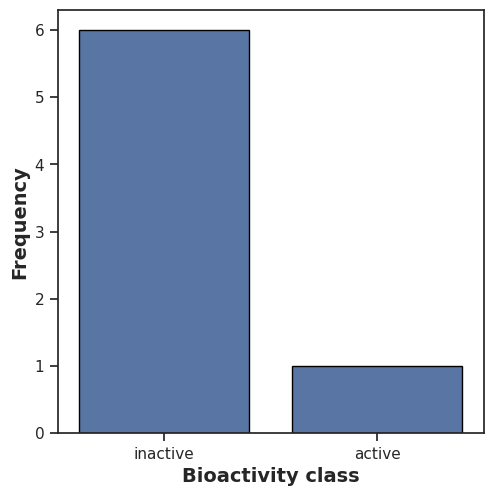

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

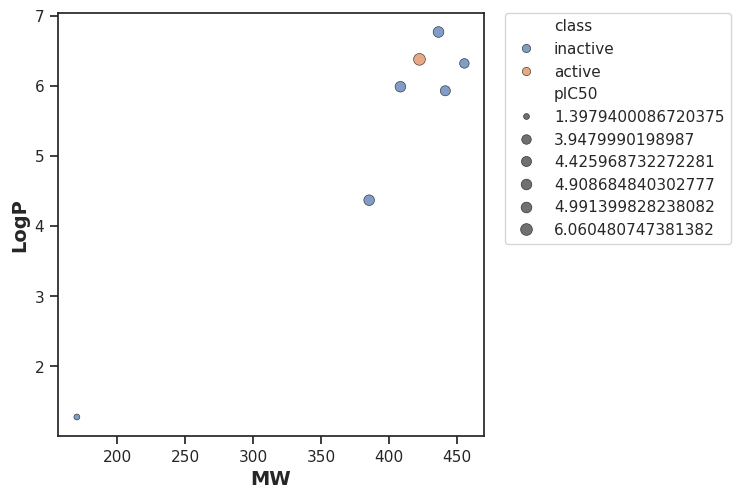

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

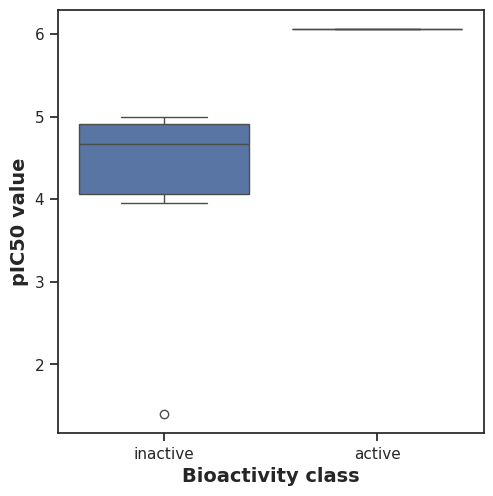

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [31]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [32]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6.0,0.207196,0.05,Same distribution (fail to reject H0)


#### **MW**

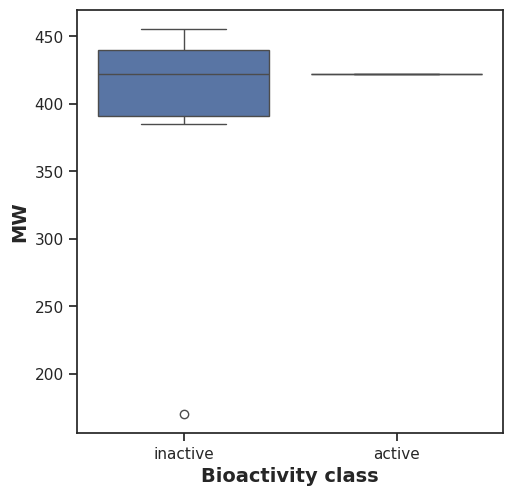

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3.0,1.0,0.05,Same distribution (fail to reject H0)


#### **LogP**

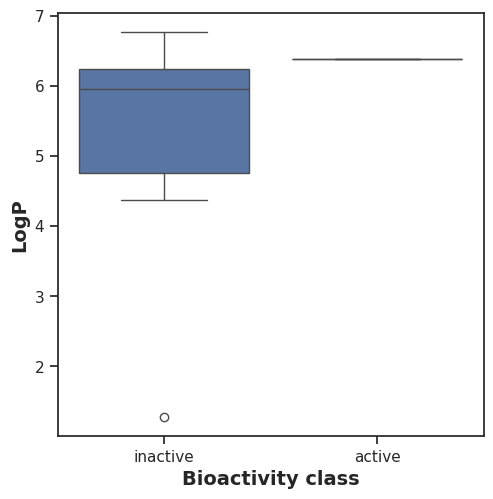

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5.0,0.571429,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

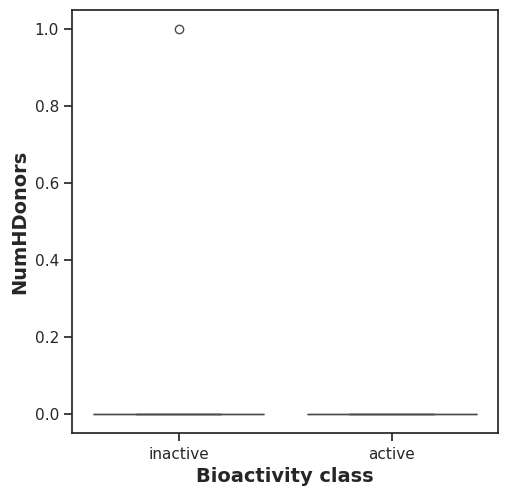

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2.5,1.0,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

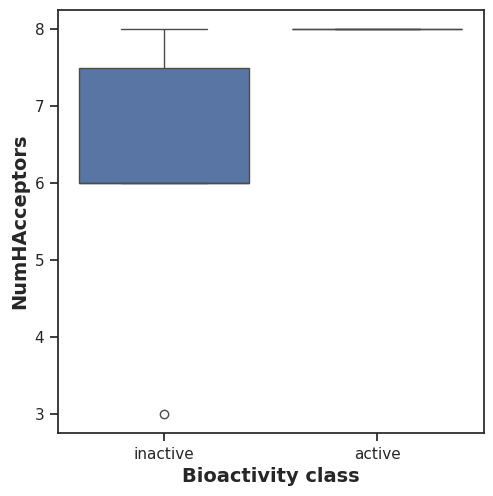

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [40]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,5.0,0.417887,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [41]:
! zip -r results.zip . -i *.csv *.pdf

  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 75%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 60%)
  adding: acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: acetylcholinesterase_07_bioactivity_data_2class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 68%)
  adding: mannwhitneyu_MW.csv (deflated 6%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 31%)
  adding: mannwhitneyu_LogP.csv (deflated 11%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 76%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 85%)
  adding: plot_MW.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: pl